In [26]:
# Import necessary libraries
import os
import sktime
import pandas as pd
from sktime.datasets import load_from_tsfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [27]:
# Load time series data
X, y = load_from_tsfile('/Users/PRADEEP SHETTY/Desktop/IEEE internship/final.ts', return_data_type="numpy3d")

In [28]:
# Reshape the time series data
X1 = X.reshape(X.shape[0], X.shape[1] * X.shape[2])

In [29]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X1, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [30]:
# Import TimeSeriesForestClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier

In [31]:
# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [200,300,400],
    "min_interval": [2, 4, 8]
}

In [33]:
grid_search = GridSearchCV(TimeSeriesForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=TimeSeriesForestClassifier(random_state=42),
             param_grid={'min_interval': [2, 4, 8],
                         'n_estimators': [200, 300, 400]},
             scoring='roc_auc')

In [34]:
# Get the best classifier from the hyperparameter tuning
clf = grid_search.best_estimator_

In [35]:
# Fit the best classifier on the combined training and validation set
clf.fit(X_train, y_train)

TimeSeriesForestClassifier(min_interval=4, random_state=42)

In [36]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [37]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7441860465116279


In [38]:
# Convert string labels to numerical values
y_test_numerical = y_test.astype(int)

In [39]:
# Calculate the predicted probabilities for the positive class (label 1)
y_pred_probabilities = clf.predict_proba(X_test)[:, 1]

In [40]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_numerical, y_pred_probabilities)
roc_auc = roc_auc_score(y_test_numerical, y_pred_probabilities)

ROC AUC: 0.8483817301875378


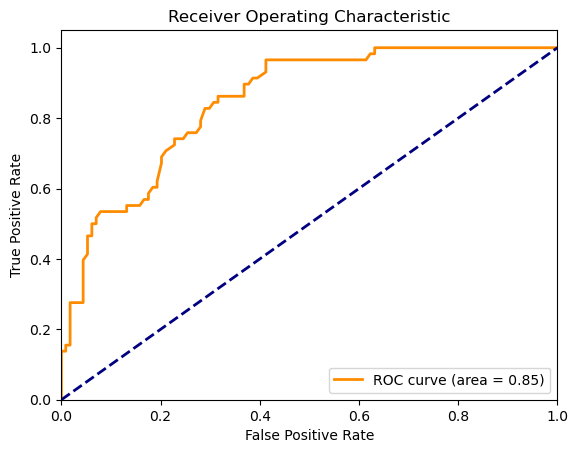

In [41]:
# Print ROC AUC score
print("ROC AUC:", roc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()